In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
pd.set_option("max_rows", 100)
pd.set_option("max_columns", None)

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine=[train_df, test_df]

In [4]:
# Missing Values Plot
def null_heatmap(combine):
    for dataset in combine:
        plt.figure(figsize=(40,10))
        sns.heatmap(dataset.isnull(), yticklabels=False, cmap='inferno')
        plt.show()

# Mismatch Datatypes

In [5]:
# Index for mismatch datatypes in train and test dataset
train_df_dtypes = list(train_df.drop(['SalePrice'], axis=1).dtypes)
test_df_dtypes = list(test_df.dtypes)
for i in range(len(train_df_dtypes)):
    if train_df_dtypes[i] != test_df_dtypes[i]:
        print("Train: {} -- {} \t Test: {} -- {}".format(train_df.columns[i], train_df.dtypes[i], test_df.columns[i], test_df.dtypes[i]))

Train: BsmtFinSF1 -- int64 	 Test: BsmtFinSF1 -- float64
Train: BsmtFinSF2 -- int64 	 Test: BsmtFinSF2 -- float64
Train: BsmtUnfSF -- int64 	 Test: BsmtUnfSF -- float64
Train: TotalBsmtSF -- int64 	 Test: TotalBsmtSF -- float64
Train: BsmtFullBath -- int64 	 Test: BsmtFullBath -- float64
Train: BsmtHalfBath -- int64 	 Test: BsmtHalfBath -- float64
Train: GarageCars -- int64 	 Test: GarageCars -- float64
Train: GarageArea -- int64 	 Test: GarageArea -- float64


# Missing Values

<br>__[3] MSZoning__: The general zoning classification

In [6]:
test_df['MSZoning'] = test_df['MSZoning'].fillna('RL')
combine = [train_df, test_df]

<br>__[4] LotFrontage__: Linear feet of street connected to property

In [7]:
train_df['LotFrontage'].isnull().sum()/train_df.shape[0]*100

17.73972602739726

In [8]:
# Correlation of Features with SalePrice
corr_df = pd.DataFrame(train_df.corr()['LotFrontage']).sort_values(by=['LotFrontage'], ascending=False).drop(['LotFrontage'], axis=0)
corr_df.head()

,LotFrontage
1stFlrSF,0.457181
LotArea,0.426095
GrLivArea,0.402797
TotalBsmtSF,0.392075
TotRmsAbvGrd,0.352096


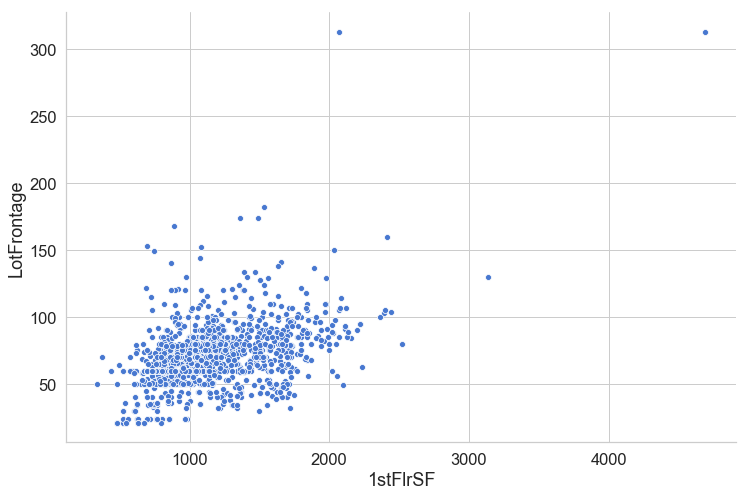

In [9]:
sns.relplot('1stFlrSF', 'LotFrontage', data=train_df, aspect=1.5, height=7)

In [10]:
# Missing values replaced with median value = 69
value = train_df['LotFrontage'].median()
for dataset in combine:
    dataset['LotFrontage'] = dataset['LotFrontage'].fillna(value)
combine = [train_df, test_df]

<br>__[7] Alley__: Type of alley access

In [11]:
train_df['Alley'].isnull().sum()/train_df.shape[0]*100

93.76712328767123

In [12]:
test_df['Alley'].isnull().sum()/test_df.shape[0]*100

92.66620973269363

In [13]:
train_df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [17]:
# Dropped Alley
train_df = train_df.drop(['Alley'], axis=1)
test_df = test_df.drop(['Alley'], axis=1)
combine= [train_df, test_df]

<br>__[26] MasVnrType__: Masonry veneer type
<br>__[27] MasVnrArea__: Masonry veneer area in square feet

In [18]:
train_df['MasVnrType'].isnull().sum()

8

In [19]:
train_df['MasVnrArea'].isnull().sum()

8

In [22]:
for dataset in combine:
    dataset['MasVnrType'] = dataset['MasVnrType'].fillna('Missing')
    dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)
combine = [train_df, test_df]

__Bsmt__

In [23]:
train_df['BsmtQual'].isnull().sum()

37

In [24]:
train_df.loc[train_df['TotalBsmtSF']==0,:].shape

(37, 80)

In [25]:
train_df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = train_df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('Missing')
test_df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = test_df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('Missing')
test_df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']] = test_df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']].fillna(0)
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(0)
combine = [train_df, test_df]

__Fireplaces__

In [26]:
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('Missing')
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna('Missing')
combine=[train_df, test_df]

__Garage__

In [27]:
train_df.loc[(train_df['GarageArea']==0),:].shape[0]

81

In [28]:
train_df['GarageType'] = train_df['GarageType'].fillna('Missing')
train_df['GarageFinish'] = train_df['GarageFinish'].fillna('Missing')
train_df['GarageQual'] = train_df['GarageQual'].fillna('Missing')
train_df['GarageCond'] = train_df['GarageCond'].fillna('Missing')

In [29]:
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(0)
combine = [train_df, test_df]

In [30]:
test_df.loc[(test_df['GarageType'].notnull()) & (test_df['GarageYrBlt'].isnull()), ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'YearBuilt']]
# 666 => Detchd 1910 Unf 1 360 TA TA 1910
# 1116 => Detchd 1923 Unf 1 330 TA TA 1923

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,YearBuilt
666,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,1910
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,1923


In [31]:
train_df['YearBuilt'].min()

1872

In [32]:
train_df.loc[train_df['YearBuilt']==1923, ['GarageArea']].mean()

GarageArea    330.0
dtype: float64

In [33]:
train_df.loc[(train_df['GarageType']=='Detchd') & (train_df['GarageCars']==1) & (train_df['GarageArea']>340) & (train_df['GarageArea']<380),['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'YearBuilt']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,YearBuilt
12,Detchd,1962.0,Unf,1,352,TA,TA,1962
59,Detchd,1973.0,Unf,1,352,TA,TA,1972
74,Detchd,1915.0,Unf,1,379,TA,TA,1915
194,Detchd,1989.0,Unf,1,352,TA,TA,1972
330,Detchd,2002.0,Unf,1,352,TA,TA,1964
387,Detchd,1977.0,Unf,1,352,TA,TA,1976
427,Detchd,1964.0,Unf,1,352,TA,TA,1957
438,Detchd,1990.0,Unf,1,352,Gd,TA,1913
459,Detchd,1950.0,Unf,1,352,TA,TA,1950
462,Detchd,1965.0,Unf,1,360,TA,TA,1965


In [34]:
test_df.loc[666, 'GarageYrBlt']=1910
test_df.loc[666, 'GarageFinish']='Unf'
test_df.loc[666, 'GarageQual']='TA'
test_df.loc[666, 'GarageCond']='TA'

test_df.loc[1116, 'GarageYrBlt']=1923
test_df.loc[1116, 'GarageFinish']='Unf'
test_df.loc[1116, 'GarageCars']=1
test_df.loc[1116, 'GarageArea']=330
test_df.loc[1116, 'GarageQual']='TA'
test_df.loc[1116, 'GarageCond']='TA'

In [35]:
test_df.loc[[666, 1116],  ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'YearBuilt']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,YearBuilt
666,Detchd,1910.0,Unf,1.0,360.0,TA,TA,1910
1116,Detchd,1923.0,Unf,1.0,330.0,TA,TA,1923


In [36]:
test_df['GarageType'] = test_df['GarageType'].fillna('Missing')
test_df['GarageFinish'] = test_df['GarageFinish'].fillna('Missing')
test_df['GarageQual'] = test_df['GarageQual'].fillna('Missing')
test_df['GarageCond'] = test_df['GarageCond'].fillna('Missing')

In [37]:
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(0)
combine = [train_df, test_df]

__Pool__

In [38]:
train_df.loc[(train_df['PoolArea']>0), ['PoolArea', 'PoolQC', 'OverallQual']]

,PoolArea,PoolQC,OverallQual
197,512,Ex,8
810,648,Fa,6
1170,576,Gd,6
1182,555,Ex,10
1298,480,Gd,10
1386,519,Fa,7
1423,738,Gd,6


In [39]:
test_df.loc[(test_df['PoolArea']>0), ['PoolArea', 'PoolQC', 'OverallQual']]

,PoolArea,PoolQC,OverallQual
514,144,Ex,10
960,368,NaN,4
1043,444,NaN,6
1113,228,Ex,8
1139,561,NaN,3
1250,800,Gd,7


In [40]:
test_df.loc[960, 'PoolQC'] = 'Fa'
test_df.loc[1043, 'PoolQC'] = 'Gd'
test_df.loc[1139, 'PoolQC'] = 'Fa'

In [41]:
test_df.loc[(test_df['PoolArea']>0), ['PoolArea', 'PoolQC', 'OverallQual']]

,PoolArea,PoolQC,OverallQual
514,144,Ex,10
960,368,Fa,4
1043,444,Gd,6
1113,228,Ex,8
1139,561,Fa,3
1250,800,Gd,7


In [42]:
train_df['PoolQC'] = train_df['PoolQC'].fillna('Missing')
test_df['PoolQC'] = test_df['PoolQC'].fillna('Missing')

__Fence__

In [43]:
train_df['Fence'] = train_df['Fence'].fillna('Missing')
test_df['Fence'] = test_df['Fence'].fillna('Missing')

__MiscFeature__

In [44]:
train_df['MiscFeature'] = train_df['MiscFeature'].fillna('Missing')
test_df['MiscFeature'] = test_df['MiscFeature'].fillna('Missing')

__Electrical__

In [45]:
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(train_df['Exterior1st'].mode()[0])
test_df['Utilities'] = test_df['Utilities'].fillna(train_df['Utilities'].mode()[0])
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(train_df['Exterior2nd'].mode()[0])
test_df['KitchenQual'] = test_df['KitchenQual'].fillna(train_df['KitchenQual'].mode()[0])
test_df['Functional'] = test_df['Functional'].fillna(train_df['Functional'].mode()[0])
test_df['SaleType'] = test_df['SaleType'].fillna(train_df['SaleType'].mode()[0])

In [46]:
train_df.isna().sum().sum()

0

In [47]:
test_df.isna().sum().sum()

0

# Mismatch Datatypes

In [48]:
# Index for mismatch datatypes in train and test dataset
train_df_dtypes = list(train_df.drop(['SalePrice'], axis=1).dtypes)
test_df_dtypes = list(test_df.dtypes)
for i in range(len(train_df_dtypes)):
    if train_df_dtypes[i] != test_df_dtypes[i]:
        print("Train: {} -- {} \t Test: {} -- {}".format(train_df.columns[i], train_df.dtypes[i], test_df.columns[i], test_df.dtypes[i]))

Train: BsmtFinSF1 -- int64 	 Test: BsmtFinSF1 -- float64
Train: BsmtFinSF2 -- int64 	 Test: BsmtFinSF2 -- float64
Train: BsmtUnfSF -- int64 	 Test: BsmtUnfSF -- float64
Train: TotalBsmtSF -- int64 	 Test: TotalBsmtSF -- float64
Train: BsmtFullBath -- int64 	 Test: BsmtFullBath -- float64
Train: BsmtHalfBath -- int64 	 Test: BsmtHalfBath -- float64
Train: GarageCars -- int64 	 Test: GarageCars -- float64
Train: GarageArea -- int64 	 Test: GarageArea -- float64


In [49]:
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].astype('int64')
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].astype('int64')
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].astype('int64')
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].astype('int64')
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].astype('int64')
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].astype('int64')
test_df['GarageCars'] = test_df['GarageCars'].astype('int64')
test_df['GarageArea'] = test_df['GarageArea'].astype('int64')

In [50]:
combine=[train_df, test_df]

In [51]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,Y,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,Ex,Y,SBrkr,1280,0,0,1280,0,0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2,506,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,763,763,GasA,Gd,Y,SBrkr,763,892,0,1655,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2,440,TA,TA,Y,157,84,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal
6,1467,20,RL,69.0,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935,Unf,0,233,1168,GasA,Ex,Y,SBrkr,1187,0,0,1187,1,0,2,0,3,1,TA,6,Typ,0,Missing,Attchd,1992.0,Fin,2,420,TA,TA,Y,483,21,0,0,0,0,Missing,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,789,789,GasA,Gd,Y,SBrkr,789,676,0,1465,0,0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2,393,TA,TA,Y,0,75,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637,Unf,0,663,1300,GasA,Gd,Y,SBrkr,1341,0,0,1341,1,0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2,506,TA,TA,Y,192,0,0,0,0,0,Missing,Missing,Missing,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,804,Rec,78,0,882,GasA,TA,Y,SBrkr,8

## Num tI Str

In [52]:
for dataset in combine:
    for col in ['MSSubClass','YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']:
        dataset[col] = dataset[col].astype(str)
combine=[train_df, test_df]

## Merging

In [53]:
# Merged
y = train_df[['SalePrice']]
df1 = train_df.drop(['SalePrice'], axis=1)
df = pd.concat([df1, test_df], axis=0)

In [54]:
df['YrDiff'] = df['YrSold'].astype(int) - df['YearBuilt'].astype(int)

# Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual','OverallCond', 
#         'YrSold', 'YearBuilt', 'MoSold', 'YearRemodAdd', 'GarageYrBlt',
        'Condition1', 'Condition2',
]
for c in cols:
    lbl = LabelEncoder()
    df[c] = lbl.fit_transform(list(df[c].values))

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null object
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null int64
Condition2       2919 non-null int64
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null object
YearRemodAdd     2919 non-null object
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 no

# __Dummies__

In [57]:
def cat_to_dummies(dataframe):
    df = dataframe.copy()
    dtype_dict = dict(df.dtypes)
    dtype_object=[]
    for k, v in dtype_dict.items():
        if v == 'object':
            dtype_object.append(k)
    for col in dtype_object:
        df = pd.get_dummies(df, columns=[col], drop_first=True)
    return df

In [58]:
df.shape

(2919, 80)

In [59]:
df = cat_to_dummies(df)

In [60]:
df.shape

(2919, 521)

In [61]:
df

,Id,LotFrontage,LotArea,Condition1,Condition2,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrDiff,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1983,YearRemodAdd_1984,YearRemodAdd_198

## Seperating

In [62]:
# Seperated
train_df = df.head(1460)
test_df = df.tail(1459)
train_df = pd.concat([train_df, y], axis=1)

# Exporting The Preprocessed Files

In [64]:
train_df.to_csv('pre-processed-train-data.csv', index=False)
test_df.to_csv('pre-processed-test-data.csv', index=False)